<center>

**EE6347 : Devices and Technologies for AI and Neuromorphic Computing**

**Assignment 2 : MNIST Classification**

Name : ANIRUDH B S ; Roll No. : EE21B019
</center>

##In the below cell, we will import the MNIST dataset and obtain the train and test data sets.

In [1]:
import tensorflow as tf
(x_train,y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


##Next we will import the Sequential model, the Dense layer, the to_categorial utility and the SGD optimizer from Keras.


In [2]:
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout  # For adding layers
from tensorflow.keras.utils import to_categorical  # For one-hot encoding labels
from tensorflow.keras.optimizers import SGD  # For optimizing the model

## Next we will convert the 3-dimensional dataset into a 2-dimensional matrix by the reshape command.

In [3]:
# Reshape the training and testing data from 28x28 images to 784-dimensional vectors
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Print the new shapes of the training and testing data
print(x_train.shape)  # Should print (60000, 784) indicating 60,000 samples with 784 features each
print(x_test.shape)   # Should print (10000, 784) indicating 10,000 samples with 784 features each

(60000, 784)
(10000, 784)


##Next we will convert the values from unsigned integers to floats and normalize with the maximum value (255).

In [4]:
# Convert pixel values from integers to floats and normalize them to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

##The next step is to perform one-hot encoding on the categorial data.

In [5]:
# Convert class vectors (integers) to one-hot encoded matrices with 10 classes
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

#Now we create the Sequential model and add the layers.

In [7]:
# Create the model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization # BatchNormalization maintains the mean output around 0 and the output std. dev. close to 1

model = Sequential()

# First hidden layer with 100 ReLU neurons, followed by BatchNormalization and Dropout
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second hidden layer with 50 tanh neurons, followed by BatchNormalization and Dropout
model.add(Dense(50, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer with 10 neurons (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#We finally define the number of epochs, create a learning rate schedule and compile the model

Model is trained on the training dataset provided

The model is evaluated against the validation to calculate the loss at the end of each epoch

In [8]:
# Initialize the SGD optimizer with a learning rate of 0.07 and without Nesterov acceleration
sgd = SGD(learning_rate=0.07, nesterov=False)

# Compile the model with the SGD optimizer, categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data, validate on the test data, with a batch size of 128 for 20 epochs
history = model.fit(x_train, y_train, batch_size=4, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.6765 - loss: 1.0185 - val_accuracy: 0.8924 - val_loss: 0.3683
Epoch 2/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.7353 - loss: 0.8583 - val_accuracy: 0.8898 - val_loss: 0.3706
Epoch 3/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7416 - loss: 0.8484 - val_accuracy: 0.8897 - val_loss: 0.3632
Epoch 4/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7372 - loss: 0.8613 - val_accuracy: 0.9000 - val_loss: 0.3349
Epoch 5/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7438 - loss: 0.8421 - val_accuracy: 0.9030 - val_loss: 0.3376
Epoch 6/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7384 - loss: 0.8571 - val_accuracy: 0.9055 - val_loss: 0.3197
Epoch 7/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7490 - loss: 0.8231 - val_accuracy: 0.8966 - val_loss: 0.3437
Epoch 8/20
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 

In [9]:
import pandas as pd

# Convert history.history dictionary to a pandas DataFrame
history_df = pd.DataFrame(history.history)

# Print the DataFrame containing the training and validation accuracy
print(history_df[['accuracy', 'val_accuracy']])

    accuracy  val_accuracy
0   0.715683        0.8924
1   0.736467        0.8898
2   0.740000        0.8897
3   0.743467        0.9000
4   0.736383        0.9030
5   0.743433        0.9055
6   0.747367        0.8966
7   0.746300        0.8967
8   0.743983        0.9010
9   0.739567        0.8966
10  0.737067        0.9046
11  0.733183        0.8853
12  0.736383        0.8913
13  0.731200        0.8943
14  0.744333        0.9039
15  0.737383        0.8962
16  0.744567        0.8953
17  0.747667        0.8911
18  0.742117        0.8921
19  0.743967        0.8977


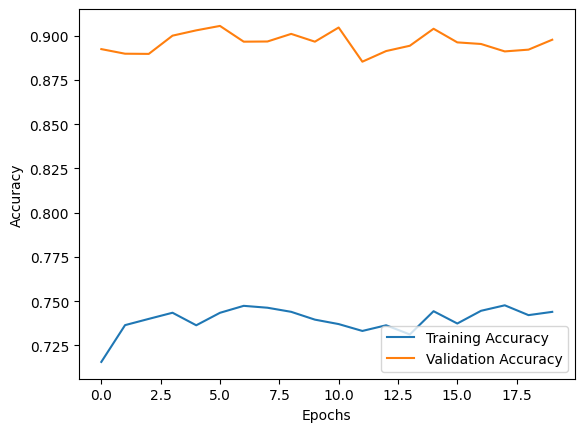

In [10]:
import matplotlib.pyplot as plt  # Import the plotting library

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot the validation accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Label the x-axis as 'Epochs'
plt.xlabel('Epochs')

# Label the y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# Add a legend to the plot, positioned at the lower right corner
plt.legend(loc='lower right')

# Display the plot
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 89.77%


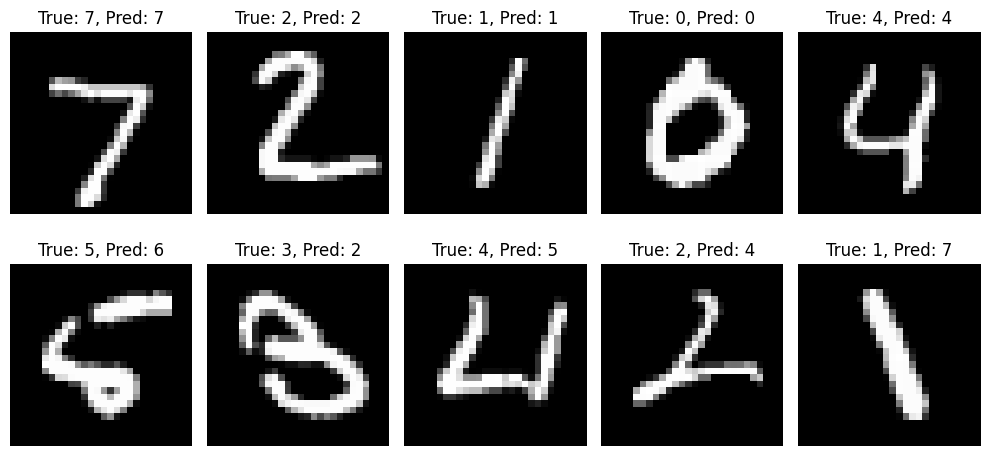

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(x_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate and print accuracy
accuracy = np.mean(y_pred_classes == y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Find the indices of correct and incorrect predictions
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Display 5 correct predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:5]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')

# Display 5 incorrect predictions
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()